# Quick analisys of the airports dataset
#### Link : https://www.kaggle.com/patrasaurabh/airstats-data-on-airports-around-the-world

In [519]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## Data importing

In [520]:
data=pd.read_csv('airports.csv')
print("Lines: ",data.shape[0])
print("columns: ",data.shape[1])
data.head() 


Lines:  67312
columns:  18


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [521]:
countries=pd.read_csv('countries.csv')
print("Lines: ",countries.shape[0])
print("columns: ",countries.shape[1])
countries.head()

Lines:  247
columns:  6


,id,code,name,continent,wikipedia_link,keywords
0,302672,AD,Andorra,EU,https://en.wikipedia.org/wiki/Andorra,NaN
1,302618,AE,United Arab Emirates,AS,https://en.wikipedia.org/wiki/United_Arab_Emir...,"UAE,مطارات في الإمارات العربية المتحدة"
2,302619,AF,Afghanistan,AS,https://en.wikipedia.org/wiki/Afghanistan,NaN
3,302722,AG,Antigua and Barbuda,NaN,https://en.wikipedia.org/wiki/Antigua_and_Barbuda,NaN
4,302723,AI,Anguilla,NaN,https://en.wikipedia.org/wiki/Anguilla,NaN


In [522]:
regions=pd.read_csv('regions.csv')
print("Lines: ",regions.shape[0])
print("columns: ",regions.shape[1])
regions.head()

Lines:  3963
columns:  8


## Data cleaning

### Drop useless columns and values

In [523]:
data.drop(['wikipedia_link','home_link','keywords'],axis=1,inplace=True) 
countries.drop(['wikipedia_link','keywords'],axis=1,inplace=True) 
regions.drop(['wikipedia_link','keywords'],axis=1,inplace=True)
data=data[data['continent']!='AN'] # we will remove Antarctica because it has few airports 
countries=countries[countries['continent']!='AN'] 
data=data[data['type']!='closed'] # drop closed airports
regions=regions[regions['local_code']!='U-A'] # drop unassigned airports in regions


,id,code,local_code,name,continent,iso_country
0,302811,AD-02,02,Canillo Parish,EU,AD
1,302812,AD-03,03,Encamp Parish,EU,AD
2,302813,AD-04,04,La Massana Parish,EU,AD
3,302814,AD-05,05,Ordino Parish,EU,AD
4,302815,AD-06,06,Sant Julià de Lòria Parish,EU,AD


### Replace confusing values

In [524]:
data['continent']=data['continent'].fillna('NoA') # NA for north america is a little bit confusing so we will fill it with NoA
countries['continent']=countries['continent'].fillna('NoA')
data['iso_country']=data['iso_country'].fillna('NAM') # well change NA to NAM for Namibia
countries['code']=countries['code'].fillna('NAM')

### convert elevation to meters

In [525]:
data.rename(columns={'elevation_ft':'elevation_m'},inplace=True) #change attribut name
data['elevation_m']=data['elevation_m']/3.2808 ## convert to meters
data.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_m,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,3.352841,NoA,US,US-PA,Bensalem,no,00A,NaN,00A
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,1047.000732,NoA,US,US-KS,Leoti,no,00AA,NaN,00AA
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,137.161668,NoA,US,US-AK,Anchor Point,no,00AK,NaN,00AK
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,249.939039,NoA,US,US-AL,Harvest,no,00AL,NaN,00AL
5,322127,00AS,small_airport,Fulton Airport,34.942803,-97.818019,335.284077,NoA,US,US-OK,Alex,no,00AS,NaN,00AS


### Verify the unicity of values

In [526]:
data.set_index('ident',inplace=True) ## set index to ident
print("index is unique ") if data.index.is_unique else print("index is not  (duplicated index )");

index is unique 


### Values sorting 

In [527]:
a=data.groupby('continent').size().sort_values(ascending=True).index # we will get the continents with the most airports
data=data[data['continent'].isin(a)] # we will keep only the continents with the most airports

In [528]:
number_per_country=data['iso_country'].value_counts()
medium_airports=data[data['type']=='medium_airport']["iso_country"].value_counts()
small_airports=data[data['type']=='small_airport']["iso_country"].value_counts()#number of airports per region for US_airports

## Data visualisation

In [529]:
# as the united states has too many airports, we will separate it in US_airports
US_airports=data[data['iso_country']=='US']
US_airports.head()

,id,type,name,latitude_deg,longitude_deg,elevation_m,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code
ident,,,,,,,,,,,,,,
00A,6523,heliport,Total Rf Heliport,40.070801,-74.933601,3.352841,NoA,US,US-PA,Bensalem,no,00A,NaN,00A
00AA,323361,small_airport,Aero B Ranch Airport,38.704022,-101.473911,1047.000732,NoA,US,US-KS,Leoti,no,00AA,NaN,00AA
00AK,6524,small_airport,Lowell Field,59.947733,-151.692524,137.161668,NoA,US,US-AK,Anchor Point,no,00AK,NaN,00AK
00AL,6525,small_airport,Epps Airpark,34.864799,-86.770302,249.939039,NoA,US,US-AL,Harvest,no,00AL,NaN,00AL
00AS,322127,small_airport,Fulton Airport,34.942803,-97.818019,335.284077,NoA,US,US-OK,Alex,no,00AS,NaN,00AS


Text(0.5, 1.0, 'Number of airports per continent')

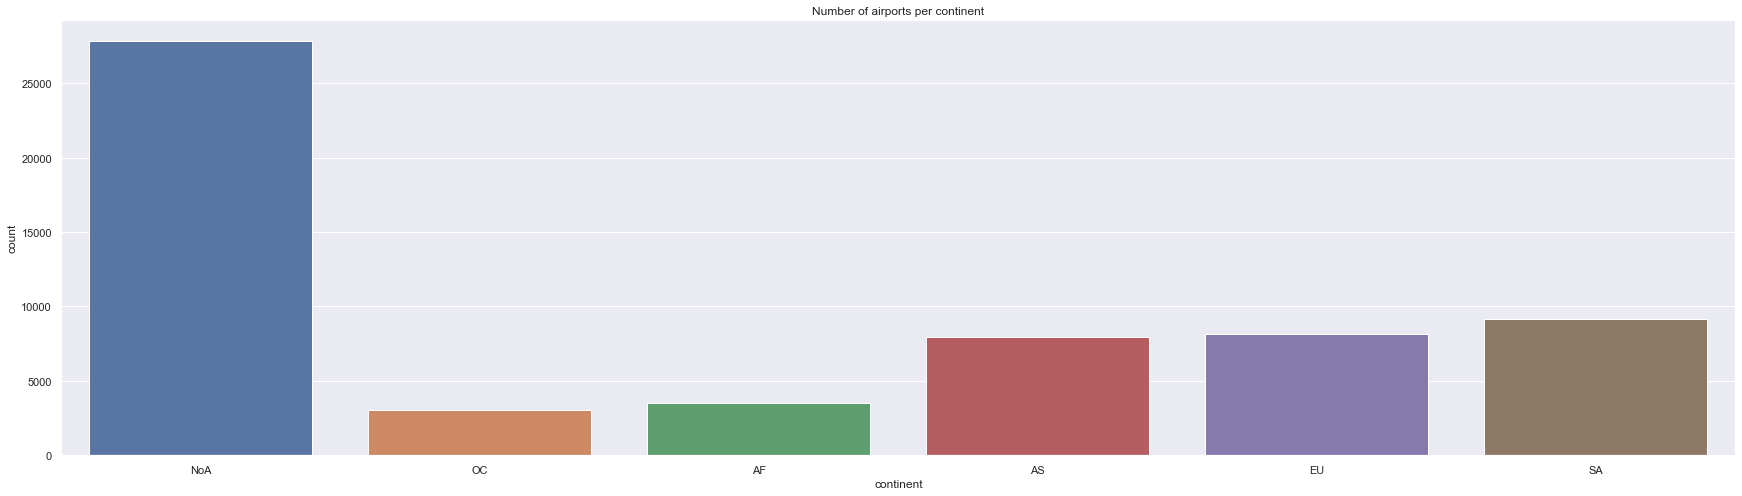

In [530]:
sns.countplot(x='continent',data=data).set_title('Number of airports per continent')

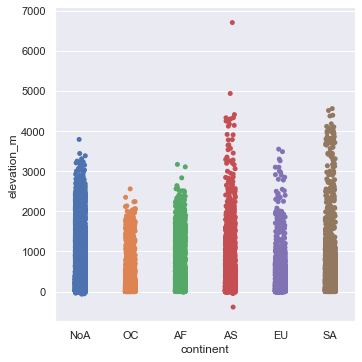

In [531]:
sns.set_theme(style="darkgrid",color_codes=True)
sns.catplot(x='continent', y='elevation_m',data=data)

### For US airports

C:\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Number of airports per region in the USA')

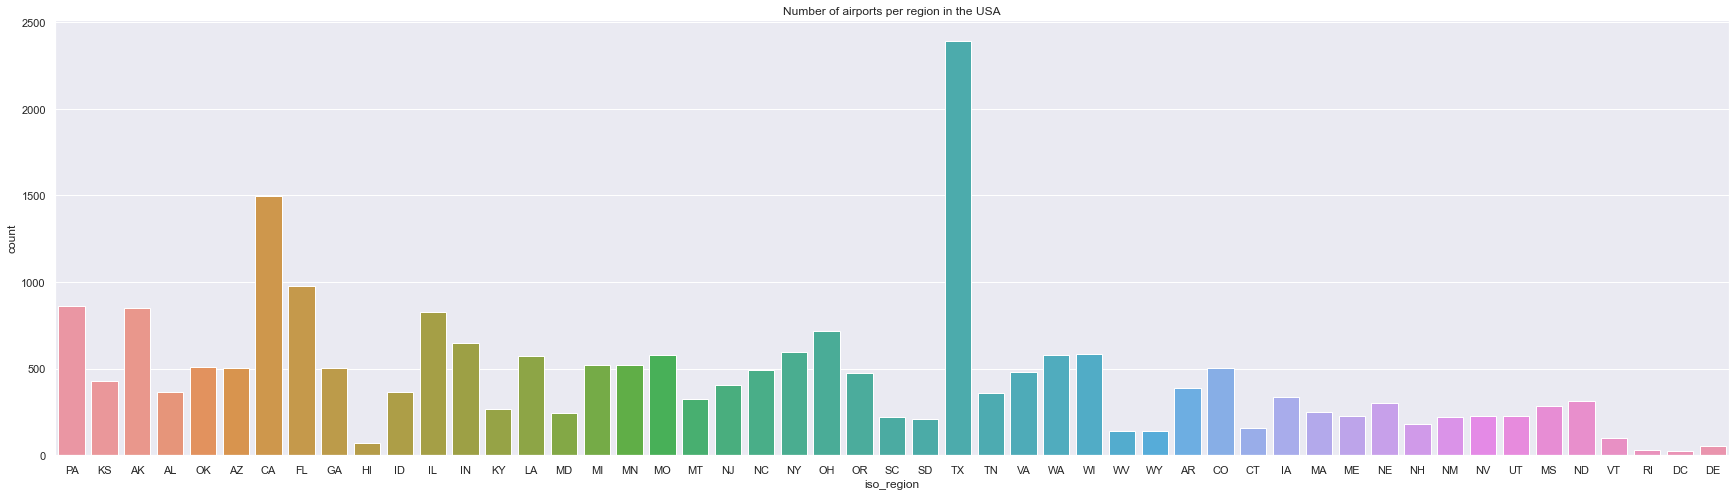

In [532]:
## plot the number of airports per region in the US
US_airports.loc[:,"iso_region"]=US_airports.loc[:,"iso_region"].replace({'US-':''}, regex=True)
## set figure size
sns.set(rc={'figure.figsize':(30,8)})
## seaborn title 
sns.countplot(x='iso_region',data=US_airports).set_title('Number of airports per region in the USA')


<ipython-input-533-70c3718d170c>:13: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



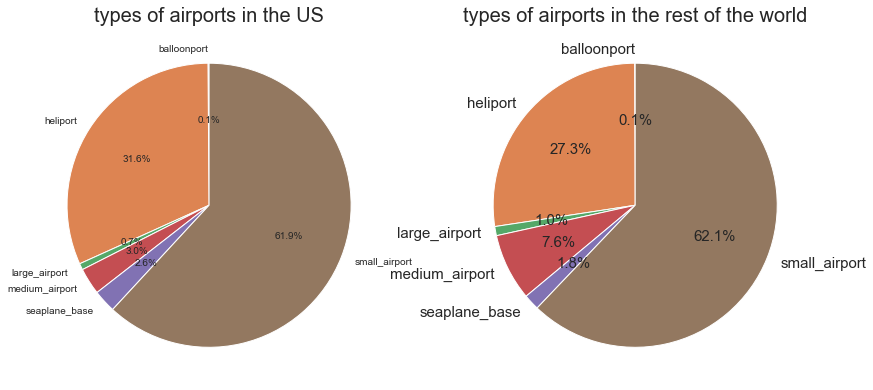

<Figure size 1800x1152 with 0 Axes>

In the US there is:
 balloonport          29
large_airport       167
seaplane_base       597
medium_airport      702
heliport           7292
small_airport     14264
Name: type, dtype: int64

while there is in the rest of the world :
 balloonport          37
large_airport       621
seaplane_base      1076
medium_airport     4546
heliport          16304
small_airport     37054
Name: type, dtype: int64


In [533]:
# subplot of the number of airports per type
counts = data['type'].value_counts().sort_index()
labels =[counts.index[i] for i in range(len(counts))]
sizes = [counts.values[i] for i in range(len(counts))]

counts_US = US_airports['type'].value_counts().sort_index()
labels_US =[counts_US.index[i] for i in range(len(counts))]
sizes_US = [counts_US.values[i] for i in range(len(counts))]


plt.figure(figsize=(14,8))

plt.subplot(1,2,1.5)
plt.pie(sizes_US,labels=labels_US,autopct='%1.1f%%',startangle=90,textprops={'fontsize':10})
plt.title('types of airports in the US',fontsize=20)

plt.subplot(1,2,2)
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,textprops={'fontsize':15})
plt.title('types of airports in the rest of the world',fontsize=20)
plt.figure(figsize=(25,16))

plt.show()
print("In the US there is:\n",counts_US.sort_values())
print("\nwhile there is in the rest of the world :\n",counts.sort_values())



In [534]:
for i in countries.index:
    #add a new column with the number of airports per country
    code=countries.loc[i,'code']

    if code in number_per_country.index:
        total=number_per_country[code]
        countries.loc[i,'number_of_airports']=total
    else:
        countries.loc[i,'number_of_airports']=0


    if code in medium_airports.index:
        total_medium=medium_airports[code]
        countries.loc[i,'number_of_medium_airports']=total_medium
    else:
        countries.loc[i,'number_of_medium_airports']=0
    
    if code in small_airports.index:
        total_small=small_airports[code]
        countries.loc[i,'number_of_small_airports']=total_small
    else:
        countries.loc[i,'number_of_small_airports']=0
        

countries.head()    

,id,code,name,continent,number_of_airports,number_of_medium_airports,number_of_small_airports
0,302672,AD,Andorra,EU,2.0,0.0,0.0
1,302618,AE,United Arab Emirates,AS,114.0,7.0,20.0
2,302619,AF,Afghanistan,AS,71.0,9.0,54.0
3,302722,AG,Antigua and Barbuda,NoA,3.0,1.0,2.0
4,302723,AI,Anguilla,NoA,1.0,1.0,0.0


In [535]:
# drop the US because it has too many airports
px.choropleth(countries, locations="name", 
                    locationmode='country names', color="number_of_airports", 
                    hover_name="number_of_airports", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='number of airports per country'
)

In [536]:
px.choropleth(countries, locations="name", 
                    locationmode='country names', color="number_of_medium_airports", 
                    hover_name="number_of_medium_airports",
                    color_continuous_scale="Viridis",
                    title='number OF MEDIUM airports per country'
)

In [537]:
px.choropleth(countries, locations="name", 
                    locationmode='country names', color="number_of_small_airports",
                    hover_name="number_of_small_airports", 
                    color_continuous_scale="Viridis",
                    title='number small airports per country'
)

### US airports per region

In [541]:
number_per_region=US_airports['iso_region'].value_counts()
US_regions=regions[regions['iso_country']=='US']

for i in US_regions.index:
    code=US_regions.loc[i,'local_code']
    total=number_per_region[code]
    US_regions.loc[i,'number_of_airports']=total

US_regions.head()

C:\Python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,code,local_code,name,continent,iso_country,number_of_airports
3696,306076,US-AK,AK,Alaska,NaN,US,852.0
3697,306077,US-AL,AL,Alabama,NaN,US,363.0
3698,306078,US-AR,AR,Arkansas,NaN,US,386.0
3699,306079,US-AZ,AZ,Arizona,NaN,US,506.0
3700,306080,US-CA,CA,California,NaN,US,1494.0


In [539]:
fig = go.Figure(data=go.Choropleth(
    locations=US_regions['local_code'], # Spatial coordinates 
    z = US_regions['number_of_airports'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'blues',
    colorbar_title = "number of airports",
))

fig.update_layout(
    title_text = 'number of airports per state',
    geo_scope='usa', # limite map scope to USA
)

fig.show()